In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astroquery.vizier import Vizier
%matplotlib inline

In [2]:
v = Vizier(columns=["**"])
v.ROW_LIMIT = -1

In [3]:
catalog_list = v.find_catalogs('Gaia DR2 open clusters in the Milky Way (Cantat-Gaudin+, 2018)')
print({k:v.description for k,v in catalog_list.items()})

{'J/A+A/618/A59': 'Gaia DR2 confirmed new nearby open clusters (Castro-Ginard+, 2018)', 'J/A+A/618/A93': 'Gaia DR2 open clusters in the Milky Way (Cantat-Gaudin+, 2018)'}


In [4]:
gaudin = v.get_catalogs(catalog_list.keys())
print(gaudin)

TableList with 4 tables:
	'0:J/A+A/618/A59/centers' with 17 column(s) and 23 row(s) 
	'1:J/A+A/618/A59/members' with 12 column(s) and 1318 row(s) 
	'2:J/A+A/618/A93/table1' with 28 column(s) and 1229 row(s) 
	'3:J/A+A/618/A93/members' with 28 column(s) and 401448 row(s) 


In [5]:
clusters = gaudin[2]
members = gaudin[3]

In [6]:
filter_ngc663_stars = np.where(members['Cluster'] == 'NGC_663')
ngc_663 = members[filter_ngc663_stars]
#filter2 = np.where(ngc_663['PMemb'] > 0.5)
#ngc_663 = ngc_663[filter2]
ngc_663

<Table masked=True length=1773>
    RA_ICRS         DE_ICRS     ...     _RA.icrs        _DE.icrs   
      deg             deg       ...       deg             deg      
    float64         float64     ...     float64         float64    
--------------- --------------- ... --------------- ---------------
 26.94022044271  60.88475065207 ...  26.94022988441  60.88475328707
 26.53907067373  60.98071373888 ...  26.53908203441  60.98071515110
 26.78033783312  61.00547647608 ...  26.78034827888  61.00547775914
 26.35913940163  60.86744114811 ...  26.35914645917  60.86744533742
 26.81187432300  60.97265097024 ...  26.81188462488  60.97265208968
 27.21027031196  60.90796741905 ...  27.21027906982  60.90796864183
 26.65552910011  60.97419429410 ...  26.65553585300  60.97419529729
 26.44741469658  61.02330442497 ...  26.44742403728  61.02330535928
 27.08486027539  61.06449172675 ...  27.08487012658  61.06449347481
            ...             ... ...             ...             ...
 26.93004442591  61.63957175254 ...  26.93005426943  61.63957253185
 26.78495623471  61.64688364579 ...  26.78496529180  61.64688445093
 26.24234796773  60.79124766095 ...  26.24235775242  60.79124941331
 25.86240959018  60.91264429353 ...  25.86241889844  60.91264546895
 26.15648525059  60.83146663131 ...  26.15649517126  60.83146873673
 26.15436551120  60.81218898803 ...  26.15437838353  60.81218870817
 25.84350106720  60.95399362936 ...  25.84351581481  60.95399511478
 25.75940340991  60.97557547304 ...  25.75941310042  60.97557597679
 25.65219119901  61.05174609015 ...  25.65220459551  61.05174431195
 25.64614176810  61.06763057509 ...  25.64614989369  61.06763299481

Text(0, 0.5, 'pmDE [mas/yr]')

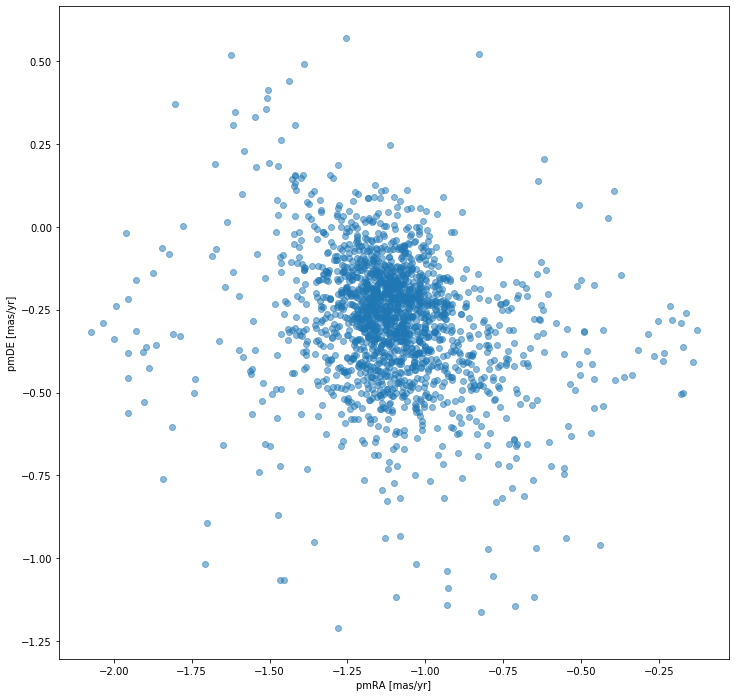

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(ngc_663['pmRA'], ngc_663['pmDE'], alpha=0.5)
ax.set_xlabel('pmRA [mas/yr]')
ax.set_ylabel('pmDE [mas/yr]')

In [8]:
pm_cov = np.array(ngc_663['pmRApmDEcor'])*np.array(ngc_663['e_pmRA'])*np.array(ngc_663['e_pmDE'])
tan_theta = (np.array((ngc_663['e_pmRA'])**2) - (np.array(ngc_663['e_pmDE'])**2))/pm_cov

In [9]:
theta = np.arctan(tan_theta)

In [10]:
theta = np.rad2deg(theta)

Text(0, 0.5, 'pmDE [mas/yr]')

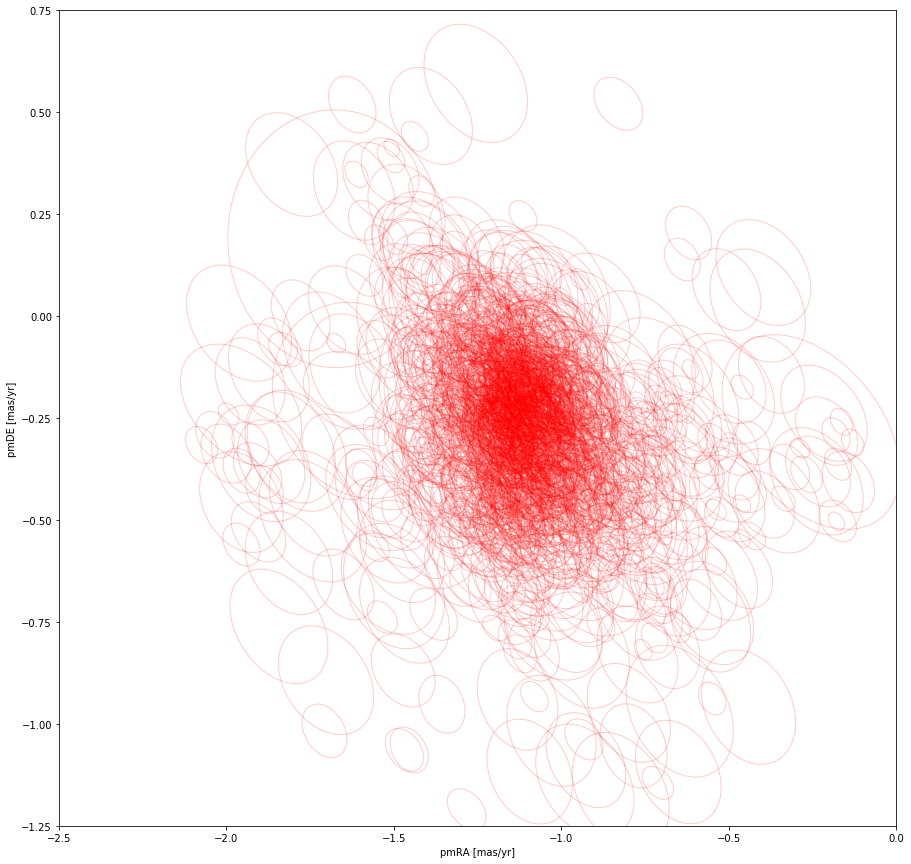

In [11]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(15,15))
#ax.set_aspect('equal')
for i in range(len(theta)):
    g_ellipse = patches.Ellipse((ngc_663['pmRA'][i], ngc_663['pmDE'][i]), 2*ngc_663['e_pmRA'][i], 
                                2*ngc_663['e_pmDE'][i], angle=theta[i], fill=False, edgecolor='red', linewidth=1, 
                                alpha=0.2)
    ax.add_patch(g_ellipse)
    
ax.set_xlim(-2.5, 0)   
ax.set_ylim(-1.25, 0.75) 
ax.set_xlabel('pmRA [mas/yr]')
ax.set_ylabel('pmDE [mas/yr]')

In [12]:
ngc_663_data = clusters[clusters['Cluster'] == 'NGC_663']
ngc_663_data

<Table masked=True length=1>
Cluster RAJ2000 DEJ2000   GLON    GLAT  ...    Y        Z      Rgc   SimbadName
          deg     deg     deg     deg   ...    pc       pc      pc             
bytes17 float32 float32 float32 float32 ... float64  float32 float32  bytes25  
------- ------- ------- ------- ------- ... -------- ------- ------- ----------
NGC_663  26.586  61.212 129.494  -0.958 ...   2210.9   -47.9 10399.9    NGC 663

Text(0, 0.5, 'pmDE [mas/yr]')

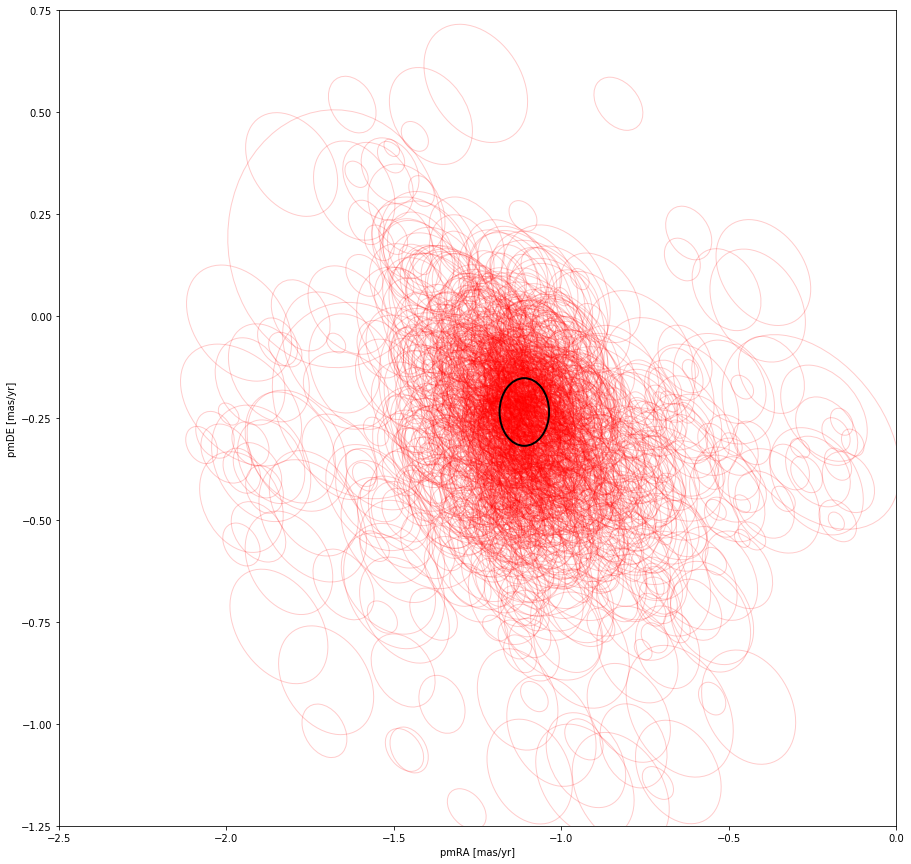

In [13]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(15,15))
#ax.set_aspect('equal')
for i in range(len(theta)):
    g_ellipse = patches.Ellipse((ngc_663['pmRA'][i], ngc_663['pmDE'][i]), 2*ngc_663['e_pmRA'][i], 
                                2*ngc_663['e_pmDE'][i], angle=theta[i], fill=False, edgecolor='red', linewidth=1, 
                                alpha=0.2)
    ax.add_patch(g_ellipse)

cluster_ellipse = patches.Ellipse((ngc_663_data['pmRA'][0], ngc_663_data['pmDE'][0]), 2*ngc_663_data['s_pmRA'][0], 
                                  2*ngc_663_data['s_pmDE'][0], angle=0, fill=False, edgecolor='black', linewidth=2)
ax.add_patch(cluster_ellipse)    
    
ax.set_xlim(-2.5, 0)   
ax.set_ylim(-1.25, 0.75) 
ax.set_xlabel('pmRA [mas/yr]')
ax.set_ylabel('pmDE [mas/yr]')